<h1>Análise da situação acadêmica de um aluno</h1>
 Sugestão de monitoramento pelo orientador acadêmico

O regime de observação do desempenho acadêmico oferece suporte acadêmico mais efetivo ao aluno com dificuldades na evolução da sua integralização curricular. É colocado sob este regime o aluno que no semestre anterior
houver incorrido em uma ou mais das seguintes situações:<br>
· <b>Insucesso (trancamento e/ou reprovação)</b> <font color=red>pela segunda vez ou mais, consecutiva ou não, em um mesmo componente</font> curricular obrigatório ou seus equivalentes;<br>
· <font color=red>Insucesso em metade ou mais da carga horária matriculada</font>, caracterizado pelo <b>IECH (Índice de Eficiência em Carga Horária) igual ou inferior a 0,5 no semestre</b>;<br>
· Integralização de <font color=red>metade ou menos da carga horária esperada em função do número semestres cursados</font>, caracterizada pelo <b>IEPL (Índice de Eficiência em Períodos Letivos) igual ou inferior a 0,5</b>, após decorrido pelo menos metade da duração padrão do curso.<br>
A solicitação de matrícula em disciplinas, de trancamentos de matrícula ou de suspensão de programa do aluno só é efetivada após deferimento pelo orientador acadêmico ou, na falta dele, pelo coordenador do curso.

In [96]:
#Imports das libs necessárias para as análises

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.sampledata

#bokeh.sampledata.download()
from IPython.core.display import display, HTML

In [97]:
#Load dos datasets

df_matriculas = pd.read_csv('datasets/Matriculas-em-componentes/matricula-componente-20172.csv', sep=';')
df_componentes = pd.read_csv('datasets/componentes-curriculares-presenciais.csv', sep=';', usecols=['id_componente', 'tipo_componente', 'codigo', 'nivel', 'nome','ch_total'] , low_memory=False)
df_cursos = pd.read_csv('datasets/Cursos/cursos-de-graduacao.csv', sep=';', usecols=['id_curso', 'nome_curso', 'area_conhecimento', 'nivel_ensino', 'turno', 'municipio', 'campus'])
df_estruturas = pd.read_csv('datasets/estruturas-curriculares.csv', usecols=['id_curriculo', 'codigo', 'nome_matriz', 'id_curso', 'nome_curso'], sep=';')
df_turmas = pd.read_csv('datasets/Turmas/turmas-2017.2.csv', usecols=['id_turma', 'codigo_turma', 'id_componente', 'nivel_ensino', 'periodo', 'capacidade_aluno', 'tipo', 'distancia', 'qtd_aulas_lancadas', 'situacao_turma', 'convenio','modalidade_participantes'], sep=';')


In [98]:
#Atalho para o local dos datasets de Matrículas em Componentes

arquivo = "datasets/Matriculas-em-componentes/"

aluno_id = '91fbe8c5c2f52742c2c1dc15d286a3f3'

In [43]:
# Tratamento dos dados

# DataFrame que terá os dados dos ingressantes 
df_notas_alunos = pd.DataFrame()


# Juntando todos os dados em um único arquivo

for root, dirs, files in os.walk(arquivo):
    for filename in files:
        print(root + filename)
        # Ler arquivo
        df_notas_alunos = pd.read_csv((root + filename), sep=';')
        # Filtra pelo curso 
        df_notas_alunos_filter = df_notas_alunos[df_notas_alunos.id_discente == aluno_id]
        # Salva no DataFrame que declaramos no início
        df_notas_alunos = pd.concat([df_notas_alunos, df_notas_alunos_filter])

datasets/Matriculas-em-componentes/matricula-componente-20131.csv
datasets/Matriculas-em-componentes/matricula-componente-20132.csv
datasets/Matriculas-em-componentes/matricula-componente-20141.csv
datasets/Matriculas-em-componentes/matricula-componente-20142.csv
datasets/Matriculas-em-componentes/matricula-componente-2015.1.csv
datasets/Matriculas-em-componentes/matricula-componente-2015.2.csv
datasets/Matriculas-em-componentes/matricula-componente-2016.1.csv
datasets/Matriculas-em-componentes/matricula-componente-2016.2.csv
datasets/Matriculas-em-componentes/matricula-componente-20171.csv
datasets/Matriculas-em-componentes/matricula-componente-20172.csv


In [99]:
#df_notas_alunos_selected = df_notas_alunos.query('id_discente == "91fbe8c5c2f52742c2c1dc15d286a3f3"')
df_notas_alunos_selected = df_notas_alunos_selected.query('descricao == "CANCELADO" | descricao == "REPROVADO" | descricao == "DESISTENCIA"')
df_notas_alunos_selected

id_turma                       id_discente   id_curso  unidade  nota  \
1       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.0   
2       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.0   
3       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
1318    57606525  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.9   
1319    57606525  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.1   
1320    57606525  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
1407    57609240  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.0   
1408    57609240  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
1409    57609240  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.0   
77798   57608087  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.0   
77799   57608087  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
77800   57608087  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.0   
143339  57609138  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   NaN   
143340  57609138  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   NaN   
143341  57609138  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
230816  57609141  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      NaN   NaN   
242087  57609267  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      NaN   NaN   
1       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.0   
2       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.0   
3       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
1318    57606525  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.9   
1319    57606525  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.1   
1320    57606525  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
1407    57609240  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.0   
1408    57609240  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
1409    57609240  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.0   
77798   57608087  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   0.0   
77799   57608087  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
77800   57608087  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   0.0   
143339  57609138  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      3.0   NaN   
143340  57609138  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      2.0   NaN   
143341  57609138  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      1.0   0.0   
230816  57609141  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      NaN   NaN   
242087  57609267  91fbe8c5c2f52742c2c1dc15d286a3f3  2000030.0      NaN   NaN   

       reposicao  faltas_unidade  media_final  numero_total_faltas  \
1              f             0.0          0.0                 48.0   
2              f             0.0          0.0                 48.0   
3              f             0.0          0.0                 48.0   
1318           f             0.0          0.3                 25.0   
1319           f             0.0          0.3                 25.0   
1320           f             0.0          0.3                 25.0   
1407           f             0.0          0.0                  0.0   
1408           f             0.0          0.0                  0.0   
1409           f             0.0          0.0                  0.0   
77798          f             0.0          0.0                 46.0   
77799          f             0.0          0.0                 46.0   
77800          f             0.0          0.0                 46.0   
143339         f             0.0          NaN                  0.0   
143340         f             0.0          NaN                  0.0   
143341         f             0.0          NaN                  0.0   
230816       NaN             NaN          NaN                  NaN   
242087       NaN 

In [100]:
#Filtros e merges - Preparando dataframes

df_matriculas = df_matriculas.drop_duplicates()
#Seleção dos cursos de graduação, alvo do projeto de mestrado
df_turmas = df_turmas.loc[df_turmas['nivel_ensino'] == 'GRADUAÇÃO']

df_componentes_turmas = pd.merge(df_componentes, df_turmas)
df_componentes_turmas = df_componentes_turmas.drop_duplicates()

df_cursos_componentes_turmas = pd.merge(df_cursos, df_componentes_turmas)
df_cursos_componentes_turmas = df_cursos_componentes_turmas.drop_duplicates()

df_matriculas_cursos_componentes_turmas = pd.merge(df_matriculas, df_cursos_componentes_turmas)
df_matriculas_cursos_componentes_turmas = df_matriculas_cursos_componentes_turmas.drop_duplicates()

df_matriculas_cursos_componentes_turmas.drop(['nivel_ensino', 'turno', 'municipio', 'campus', 'codigo', 'nivel', 'periodo', 'capacidade_aluno', 'tipo', 'distancia', 'situacao_turma'], axis=1, inplace=True)


In [101]:
#Retirando os campos nulos da coluna nota

df_matriculas_cursos_componentes_turmas = df_matriculas_cursos_componentes_turmas.loc[(df_matriculas_cursos_componentes_turmas['nota'] >= 0) & (df_matriculas_cursos_componentes_turmas['nota'] <= 10)]

In [47]:
df_matriculas_cursos_componentes_turmas.columns

Index(['id_turma', 'id_discente', 'id_curso', 'unidade', 'nota', 'reposicao',
       'faltas_unidade', 'media_final', 'numero_total_faltas', 'descricao',
       'nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente',
       'nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio',
       'modalidade_participantes'],
      dtype='object')

In [48]:
#Selecionando as colunas necessárias para análise

coluna = ['id_curso', 'reposicao', 'faltas_unidade', 'area_conhecimento', 'id_componente', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio','modalidade_participantes']
#, 'id_curso', 'unidade', 'reposicao', 'media_final', 'numero_total_faltas', 'descricao','nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente','nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio','modalidade_participantes'
for x in coluna:
    df_matriculas_cursos_componentes_turmas.drop(x, axis=1, inplace=True)
    print(x)

id_curso
reposicao
faltas_unidade
area_conhecimento
id_componente
codigo_turma
qtd_aulas_lancadas
convenio
modalidade_participantes


In [117]:
#df_matriculas_cursos_componentes_turmas.descricao
df_matriculas_cursos_componentes_turmas

id_turma                       id_discente     id_curso  unidade  \
1       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3    2000030.0      3.0   
2       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3    2000030.0      2.0   
3       57610457  91fbe8c5c2f52742c2c1dc15d286a3f3    2000030.0      1.0   
4       57610457  7c64aa349e5565426721790cfd03a326    2000030.0      1.0   
5       57610457  7c64aa349e5565426721790cfd03a326    2000030.0      3.0   
6       57610457  7c64aa349e5565426721790cfd03a326    2000030.0      2.0   
7       57610457  a0e2a12d4ebf86dac1e9c234905e2082    2000030.0      3.0   
8       57610457  a0e2a12d4ebf86dac1e9c234905e2082    2000030.0      2.0   
9       57610457  a0e2a12d4ebf86dac1e9c234905e2082    2000030.0      1.0   
10      57610457  82c3b11e071e1a2482a808cc9901e645    2000030.0      3.0   
11      57610457  82c3b11e071e1a2482a808cc9901e645    2000030.0      2.0   
12      57610457  82c3b11e071e1a2482a808cc9901e645    2000030.0      1.0   
13      57610457  38333e634e927a15dec3855097cf644e    2000030.0      3.0   
14      57610457  38333e634e927a15dec3855097cf644e    2000030.0      2.0   
15      57610457  38333e634e927a15dec3855097cf644e    2000030.0      1.0   
16      57610457  dbbd20f860802c9dd514c96671acdb19    2000030.0      3.0   
17      57610457  dbbd20f860802c9dd514c96671acdb19    2000030.0      2.0   
18      57610457  dbbd20f860802c9dd514c96671acdb19    2000030.0      1.0   
19      57610457  6e953dc421f55e36a8f78975bfe319ec    2000030.0      3.0   
20      57610457  6e953dc421f55e36a8f78975bfe319ec    2000030.0      1.0   
21      57610457  6e953dc421f55e36a8f78975bfe319ec    2000030.0      2.0   
22      57610457  04fdbf7e1d109d13719f9cc446184c25    2000030.0      3.0   
23      57610457  04fdbf7e1d109d13719f9cc446184c25    2000030.0      2.0   
24      57610457  04fdbf7e1d109d13719f9cc446184c25    2000030.0      1.0   
26      57610457  722a48fdd3fc631ad4e3dde2f46f09d8    2000030.0      3.0   
27      57610457  722a48fdd3fc631ad4e3dde2f46f09d8    2000030.0      2.0   
28      57610457  722a48fdd3fc631ad4e3dde2f46f09d8    2000030.0      1.0   
29      57610457  6cee9d1345f7cb5d93af57cde89209c6    2000030.0      3.0   
30      57610457  6cee9d1345f7cb5d93af57cde89209c6    2000030.0      2.0   
31      57610457  6cee9d1345f7cb5d93af57cde89209c6    2000030.0      1.0   
...          ...                               ...          ...      ...   
368342  57607244  bb6486db9822b681c53b3de2bb609227    2000058.0      3.0   
368343  57607244  bb6486db9822b681c53b3de2bb609227    2000058.0      2.0   
368344  57607244  bb6486db9822b681c53b3de2bb609227    2000058.0      1.0   
368345  57611838  4c39d744d45e3f265dd04ef7916699f6    2000045.0      3.0   
368346  57611838  4c39d744d45e3f265dd04ef7916699f6    2000045.0      2.0   
368347  57611838  4c39d744d45e3f265dd04ef7916699f6    2000045.0      1.0   
368348  57604862  fef314c6677b28cce1c4509e2d2c201a  118834827.0      1.0   
368349  57604862  fef314c6677b28cce1c4509e2d2c201a  118834827.0      3.0   
368350  57604862  fef314c6677b28cce1c4509e2d2c201a  118834827.0      2.0   
368351  57606757  e9c4d0aaa1adf719efa4e79c3e752c07    2000018.0      3.0   
368352  57606757  e9c4d0aaa1adf719efa4e79c3e752c07    2000018.0      2.0   
368353  57606757  e9c4d0aaa1adf719efa4e79c3e752c07    2000018.0      1.0   
368354  57606758  1bd05578dd7b5b1117631934802d67fb    2000014.0      3.0   
368355  57606758  1bd05578dd7b5b1117631934802d67fb    2000014.0      2.0   
368356  57606758  1bd05578dd7b5b1117631934802d67fb    2000014.0      1.0   
368358  57604910  a4a40dc7f3f05a88af7271aad76fc918    6633741.0      3.0   
368359  57604910  a4a40dc7f3f05a88af7271aad76fc918    6633741.0      2.0   
368360  57604910  a4a40dc7f3f05a88af7271aad76fc918    6633741.0      1.0   
368365  57604903  d2bc2455ed24ee1e0e92469737e15009   85322080.0      3.0   
368366  57604903  d2bc2455ed24ee1e0e92469737e15009   85322080.0      2.0   
368367  57604903  d2bc2455ed24ee1e0e92469737e15009   853

In [49]:
#df_matriculas_cursos_componentes_turmas.count()
#df_matriculas_cursos_componentes_turmas_selected = df_matriculas_cursos_componentes_turmas.loc[df_matriculas_cursos_componentes_turmas['descricao'] == 'CANCELADO'].count()
#df_matriculas_cursos_componentes_turmas_selected

id_turma               8635
id_discente            8635
unidade                8635
nota                   8635
media_final            7113
numero_total_faltas    8635
descricao              8635
nome_curso             8635
tipo_componente        8635
nome                   8635
ch_total               8635
dtype: int64

In [129]:
#Filtro de Aluno e contagem por situação acadêmica

df_filtro_aluno_RODA = df_matriculas_cursos_componentes_turmas.query('id_discente == "f6f768f9b06bcdf21f837e38f1e72c28" & (unidade == 1.0)')

df_filtro_disciplinas_insucesso = df_matriculas_cursos_componentes_turmas.query('id_discente == "f6f768f9b06bcdf21f837e38f1e72c28" & (descricao == "REPROVADO" | descricao == "REPROVADO POR MÉDIA E POR FALTAS"| descricao == "TRANCADO"| descricao == "CANCELADO"| descricao == "DESISTENCIA")')

df_filtro_quantidade_matriculas_discente = (df_filtro_aluno_RODA.filter(like='id_discente').sum(axis=1) == "f6f768f9b06bcdf21f837e38f1e72c28").sum()

df_filtro_aluno_RODA_APROVADO = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "APROVADO").sum()
df_filtro_aluno_RODA_APROVADO_POR_NOTA = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "APROVADO POR NOTA").sum()
df_filtro_aluno_RODA_REPROVADO = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "REPROVADO").sum()
df_filtro_aluno_RODA_REPROVADO_M_F = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "REPROVADO POR MÉDIA E POR FALTAS").sum()
df_filtro_aluno_RODA_CANCELADO = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "CANCELADO").sum()
df_filtro_aluno_RODA_TRANCADO = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "TRANCADO").sum()
df_filtro_aluno_RODA_DESISTENCIA = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "DESISTENCIA").sum()
df_filtro_aluno_RODA_INDEFERIDO = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "INDEFERIDO").sum()
df_filtro_aluno_RODA_EXCLUIDA = (df_filtro_aluno_RODA.filter(like='descricao').sum(axis=1) == "EXCLUIDA").sum()


In [138]:
#Condições para disparo de alertas

total_carga_horaria_matriculada = df_filtro_quantidade_matriculas_discente
metade_carga_horária = round(df_filtro_quantidade_matriculas_discente/2)
fator_proximo_da_metade_carga_horária = round(df_filtro_quantidade_matriculas_discente/1.5)
#fator_proximo_da_metade_carga_horária = 8
insucesso_carga_horaria_matriculada = df_filtro_aluno_RODA_REPROVADO + df_filtro_aluno_RODA_REPROVADO_M_F + df_filtro_aluno_RODA_CANCELADO + df_filtro_aluno_RODA_TRANCADO + df_filtro_aluno_RODA_DESISTENCIA
#insucesso_carga_horaria_matriculada = 1
sucesso_carga_horaria_matriculada = df_filtro_aluno_RODA_APROVADO + df_filtro_aluno_RODA_APROVADO_POR_NOTA

def roda_ufrn(RODA):

    while (RODA == True):
        
        if insucesso_carga_horaria_matriculada >= metade_carga_horária:
            display(HTML('<center><img src="datasets/imagens/vermelho.jpg" alt=""><h3>O aluno encontra-se em RODA (Regime de Observação do Desempenho Acadêmico). O que determina os Artigo 314 a 318 - Resolução nº 171/2013-CONSEPE ele deverá ser acompanhado sistematicamente pelo orientador acadêmico</h3></center>'))     
            print ("Curso:",df_filtro_aluno_RODA.nome_curso.unique())
            print (" ")
            print ("O aluno",df_filtro_aluno_RODA.id_discente.unique(),"obteve insucesso em",insucesso_carga_horaria_matriculada,"das",total_carga_horaria_matriculada,"disciplinas matriculadas.")
            print (" ")
            print ("São elas: ",df_filtro_disciplinas_insucesso.nome.unique())
            
        elif insucesso_carga_horaria_matriculada == 0:
            display(HTML('<center><img src="datasets/imagens/verde.jpg" alt=""><h3>O aluno está de parabéns porque esteve fora de risco de entrar no Regime de Observação</h3></center>'))
            print ("Curso:",df_filtro_aluno_RODA.nome_curso.unique())
            print (" ")
            print ("O aluno",df_filtro_aluno_RODA.id_discente.unique(),"obteve sucesso em",sucesso_carga_horaria_matriculada,"das",total_carga_horaria_matriculada,"disciplinas matriculadas.")
            print (" ")
            print ("São elas: ",df_filtro_aluno_RODA.nome.unique())
            
        else :
            display(HTML('<center><img src="datasets/imagens/amarelo.jpg" alt=""><h3>Sugerimos a atenção para alertar ao discente que ele esteve próximo de entrar em RODA</h3></center>'))
            print ("Curso:",df_filtro_aluno_RODA.nome_curso.unique())
            print (" ")
            print ("O aluno",df_filtro_aluno_RODA.id_discente.unique(),"obteve insucesso em",insucesso_carga_horaria_matriculada, "disciplina(s) matriculada(s).")
            print ("Total das disciplinas matriculadas:",total_carga_horaria_matriculada)
            print (" ")
            print ("Confira abaixo: ")
            print (" ")
            print (df_filtro_disciplinas_insucesso.nome.unique())
        
        RODA = False


In [139]:
chama_roda = roda_ufrn(True)

Curso: ['ARQUITETURA E URBANISMO']
 
O aluno ['f6f768f9b06bcdf21f837e38f1e72c28'] obteve insucesso em 1 disciplina(s) matriculada(s).
Total das disciplinas matriculadas: 7
 
Confira abaixo: 
 
['MARKETING DE VAREJO E SERVICOS']


In [52]:
# Percentual de Desempenho do Aluno - Aprovação e incucesso em disciplinas matriculadas no período letivo.

print ("Metade da carga horaria matriculada:", int(metade_carga_horária), "disciplinas.")

print ("Total da carga horaria matriculada:", total_carga_horaria_matriculada, "disciplinas.")

print ("Insucesso na carga horaria matriculada:", insucesso_carga_horaria_matriculada, "disciplinas.")

percentsucess = ((total_carga_horaria_matriculada - insucesso_carga_horaria_matriculada)/total_carga_horaria_matriculada)*100
percentinsucess = ((insucesso_carga_horaria_matriculada)/total_carga_horaria_matriculada)*100

print ("Percentual da carga horaria com aprovação:",int(percentsucess), "%")
print ("Percentual de insucesso em carga horaria matriculada:",int(percentinsucess), "%")

Metade da carga horaria matriculada: 2 disciplinas.
Total da carga horaria matriculada: 5 disciplinas.
Insucesso na carga horaria matriculada: 4 disciplinas.
Percentual da carga horaria com aprovação: 20 %
Percentual de insucesso em carga horaria matriculada: 80 %


In [696]:
#df_matriculas_cursos_componentes_turmas.to_csv("tabela.csv")

In [622]:
#df_matriculas_cursos_componentes_turmas.query('id_discente == "7c64aa349e5565426721790cfd03a326" & unidade == 1.0')
#df_matriculas_cursos_componentes_turmas.query('id_discente == "7c64aa349e5565426721790cfd03a326" & unidade == 2.0')
#df_matriculas_cursos_componentes_turmas.query('id_discente == "7c64aa349e5565426721790cfd03a326" & unidade == 3.0')
#df_matriculas_cursos_componentes_turmas_dropada = df_matriculas_cursos_componentes_turmas

In [53]:
#Selecionando as colunas necessárias para análise

coluna = ['id_turma', 'nome_curso', 'tipo_componente', 'ch_total']
#, 'id_curso', 'unidade', 'reposicao', 'media_final', 'numero_total_faltas', 'descricao','nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente','nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio','modalidade_participantes'
for x in coluna:
    df_matriculas_cursos_componentes_turmas_dropada.drop(x, axis=1, inplace=True)
    print(x)

NameError: name 'df_matriculas_cursos_componentes_turmas_dropada' is not defined

In [653]:
#df_matriculas_cursos_componentes_turmas_dropada1 = df_matriculas_cursos_componentes_turmas.query('id_discente == "f1328ee828ed77089059f3c4c3292326" & unidade == 1.0')
#df_matriculas_cursos_componentes_turmas_dropada2 = df_matriculas_cursos_componentes_turmas.query('id_discente == "7c64aa349e5565426721790cfd03a326" & unidade == 2.0')
#df_matriculas_cursos_componentes_turmas_dropada3 = df_matriculas_cursos_componentes_turmas.query('id_discente == "7c64aa349e5565426721790cfd03a326" & unidade == 3.0')

#df_matriculas_cursos_componentes_turmas_dropada2.rename(columns={'nota': 'nota2'}, inplace=True)
#df_matriculas_cursos_componentes_turmas_dropada2

#df_matriculas_cursos_componentes_turmas_merged = pd.merge(df_matriculas_cursos_componentes_turmas_dropada1, df_matriculas_cursos_componentes_turmas_dropada2)
#df_matriculas_cursos_componentes_turmas_merged = pd.merge(df_matriculas_cursos_componentes_turmas_merged, df_matriculas_cursos_componentes_turmas_dropada3)
df_matriculas_cursos_componentes_turmas_dropada_analises = df_matriculas_cursos_componentes_turmas.query('id_discente == "7c64aa349e5565426721790cfd03a326"')

In [645]:
#Selecionando as colunas necessárias para análise

#coluna = ['unidade', 'numero_total_faltas', 'media_final', 'numero_total_faltas', 'descricao']
#, 'id_curso', 'unidade', 'reposicao', 'media_final', 'numero_total_faltas', 'descricao','nome_curso', 'area_conhecimento', 'id_componente', 'tipo_componente','nome', 'ch_total', 'codigo_turma', 'qtd_aulas_lancadas', 'convenio','modalidade_participantes'
#for x in coluna:
#    df_matriculas_cursos_componentes_turmas_dropada3.drop(x, axis=1, inplace=True)
#    print(x)

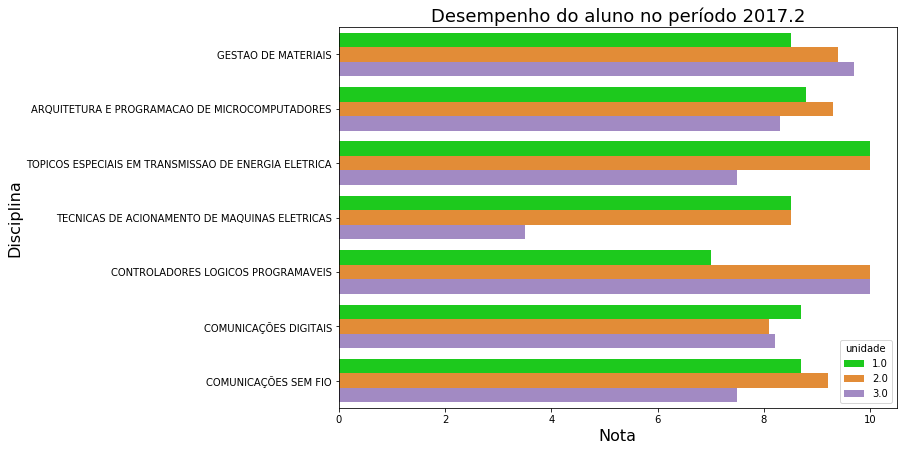

In [689]:
# Valor Médio do Veículo por tipo de câmbio

fig, ax = plt.subplots(figsize=(10,7))
colors = ["#00e600", "#ff8c1a","#a180cc"] 
sns.barplot(x="nota", y="nome",hue="unidade", palette=colors, data=df_matriculas_cursos_componentes_turmas_dropada_analises)
ax.set_title("Desempenho do aluno no período 2017.2",fontdict= {'size':18})
ax.xaxis.set_label_text("Nota",fontdict= {'size':16})
ax.yaxis.set_label_text("Disciplina",fontdict= {'size':16})
plt.show()

In [836]:
#df_filtro_aluno_RODA

In [105]:
df_analises_turmas1 = df_matriculas_cursos_componentes_turmas.query('id_turma == "57608078" & unidade == 1.0')
df_analises_turmas2 = df_matriculas_cursos_componentes_turmas.query('id_turma == "57609032" & unidade == 1.0')
df_analises_turmas3 = df_matriculas_cursos_componentes_turmas.query('id_turma == "57609161" & unidade == 1.0')
df_analises_turmas4 = df_matriculas_cursos_componentes_turmas.query('id_turma == "57608455" & unidade == 1.0')
df_analises_turmas5 = df_matriculas_cursos_componentes_turmas.query('id_turma == "57610022" & unidade == 1.0')

df_analises_turmas = pd.concat([df_analises_turmas1, df_analises_turmas2, df_analises_turmas3, df_analises_turmas4, df_analises_turmas5])
#df_analises_turmas

In [770]:
df_analises_turmas.nota.mean()

5.84423076923077

In [771]:
df_analises_turmas.nota.median()

6.300000000000001

In [772]:
df_analises_turmas.nota.max()

10.0

In [773]:
df_analises_turmas.nota.min()

0.0

In [103]:
print ("O aluno",df_filtro_aluno_RODA.id_discente.unique(),"do Curso de:",df_filtro_aluno_RODA.nome_curso.unique()), "apresenta na primeira unidade o seguinte desempenho:"
print(" ")
disciplinas = [df_filtro_aluno_RODA.nome.unique()]
notas = [df_filtro_aluno_RODA.nota]
for x in disciplinas:
    print("Na primeira unidade das disciplinas",disciplinas,"obteve as notas:")
    print(df_filtro_aluno_RODA.nota)

O aluno ['8f2687674747cc4cd6de7a13a5a7d490'] do Curso de: ['FÍSICA']
 
Na primeira unidade das disciplinas [array(['LABORATORIO DE ELETROMAGNETISMO', 'LABORATORIO DE MECANICA',
       'RELATIVIDADE ESPECIAL', 'FISICA MATEMATICA I', 'ONDAS E OPTICA'],
      dtype=object)] obteve as notas:
25186     0.0
95165     5.0
139595    0.0
140540    0.6
187313    0.0
Name: nota, dtype: float64


In [112]:
df_analises_turmas.to_csv('datasets/fisica2.csv')


In [93]:
display(HTML('<center><h2>Notas das disciplinas da primeira unidade:<br></h2><h3>LABORATORIO DE ELETROMAGNETISMO: 0,0<br>LABORATORIO DE MECANICA: 5,0<br>RELATIVIDADE ESPECIAL: 0,0<br>FISICA MATEMATICA I: 0,6<br>ONDAS E OPTICA:0,0</h3></center>'))

Text(0, 0.5, 'Disciplinas')

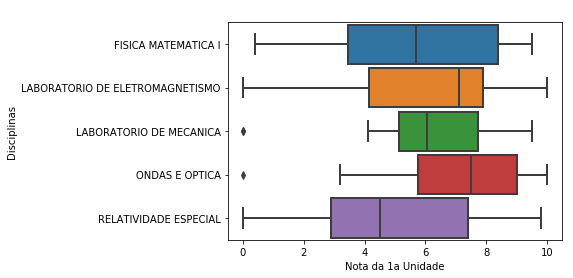

In [109]:
display(HTML('<h2>Notas das disciplinas da primeira unidade:<br></h2><h3>LABORATORIO DE ELETROMAGNETISMO: 0,0<br>LABORATORIO DE MECANICA: 5,0<br>RELATIVIDADE ESPECIAL: 0,0<br>FISICA MATEMATICA I: 0,6<br>ONDAS E OPTICA:0,0</h3>'))
sns.boxplot(x='nota', y='nome', data=df_analises_turmas, order = sorted(df_analises_turmas.nome.unique()), width=0.9, notch=False, linewidth=2)
plt.title(' ')
plt.xlabel('Nota da 1a Unidade')
plt.ylabel('Disciplinas')

<h1>Mostrando o Desempenho do aluno através de um medidor</h1>

<h3>Métrica: Desempenho do aluno de acordo com o seu percentual de aprovação nas disciplinas matriculadas no semestre letivo.
<br><br>0  - 25% : Insatisfatório<br>
26 - 50% : Regular<br>
51 - 75% : Bom<br>
76 - 100%: Ótimo
</h3>

In [54]:
#Imports das libs necessárias para as análises

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh.sampledata

#bokeh.sampledata.download()
from IPython.core.display import display, HTML
import PIL

from PIL import Image

percent = int(percentsucess)  # Porcentagem para o medidor
output_file_name = 'medidor/novo_medidor.png'

# Coordenadas X e Y da parte inferior central da agulha a partir do canto superior esquerdo da imagem
x = 825
y = 825
loc = (x, y)

percent = percent / 100
rotation = 180 * percent  # 180 graus porque o medidor é meio círculo
rotation = 90 - rotation  # Fator no gráfico da agulha apontando para 50 (90 graus)

dial = Image.open('medidor/agulha.png')
dial = dial.rotate(rotation, resample=PIL.Image.BICUBIC, center=loc)  # Rotacionando a agulha

gauge = Image.open('medidor/medidor.png')
gauge.paste(dial, mask=dial)  # Cole a agulha no medidor
gauge.save(output_file_name)

In [66]:
display(HTML('<center><h2>Desempenho do Aluno no Semestre - UFRN</h2><br><img height="400" width="400" src="medidor/novo_medidor.png" alt=""></center>'))
print ("O orientando acadêmico: ",df_filtro_aluno_RODA.id_discente.unique(),"efetuou matrícula em",total_carga_horaria_matriculada,"disciplinas e obteve a aprovação da carga horária o percentual de:",int(percentsucess),"%")

O orientando acadêmico:  ['8f2687674747cc4cd6de7a13a5a7d490'] efetuou matrícula em 5 disciplinas e obteve a aprovação da carga horária o percentual de: 20 %
